# Módulos de Julia

In [1]:
using Random
using JuMP
using Clp
using Random
using Statistics
using DataFrames
using RData
using Plots

Se cargan las funciones programadas:

In [2]:
# Se carga el script
include("funcionesModaDistribucional.jl")

k_modas_wass (generic function with 2 methods)

# Ejemplos prácticos

## Base del OIJ

In [ ]:
# Pruebas
lista_dataframes =  load("OIJ_sym_rol_prov.RData", convert = true)
dict_OIJ = lista_dataframes["lista.sym.OIJ"]

DictoVec{Matrix{Float64}}("tipo_lesion"=>[0.8036235770904107 0.17983789260385005 0.013290422551999524 0.0032481077537397937; 0.12248141942690209 0.8089960046397732 0.06005928599046269 0.008463289942862053; … ; 0.9791666666666666 0.013888888888888888 0.006944444444444444 0.0; 0.019886363636363636 0.9147727272727273 0.05113636363636364 0.014204545454545454],"sexo"=>[0.8041301627033792 0.19586983729662077; 0.9327232890836448 0.0672767109163552; … ; 0.8263888888888888 0.1736111111111111; 0.41761363636363635 0.5823863636363636],"ano"=>[0.1600214553906669 0.17211991179450503 … 0.12029918350318851 0.13725490196078433; 0.1446921854190832 0.1575374833526657 … 0.13489710873394337 0.14868754564591657; … ; 0.125 0.06944444444444445 … 0.2013888888888889 0.13194444444444445; 0.24147727272727273 0.08522727272727272 … 0.07670454545454546 0.22443181818181818],"dia"=>[0.12366648787174445 0.14163537755527744 … 0.1410095953274927 0.13987722748673936; 0.10418009193624608 0.14958972376165314 … 0.14928899772

### Gráfico del codo

In [ ]:
inercia_values = Float64[]  # Crear un vector vacío para almacenar la menor inercia intraclase
ks_values = Int[]  # Vector para almacenar los valores de K

# Fijar la semilla para reproducibilidad
Random.seed!(1234)

Kmax = 10      # Máximo número de clusters a evaluar
num_inic = 15   # Número de inicializaciones por cada valor de K

# Abrir el archivo de resumen antes de empezar para agregar resultados durante la iteración
open("resumen_inercia.txt", "w") do archivo
    println(archivo, "K\tInercia_minima")
end

# Iterar K de 2 a Kmax para evaluar diferentes números de clusters
for K in 2:Kmax
    println("Evaluando K = $K...")  # Imprimir el mensaje al inicio de cada iteración
    
    inercia_minima = Inf  # Inicializar la inercia mínima con un valor grande
    clusters_minimos = []  # Para guardar los clusters correspondientes a la menor inercia

    # Ejecutar el algoritmo varias veces para encontrar la mejor inercia para este K
    for _ in 1:num_inic
        clusters, modas, inercia_intraclase = k_modas_wass(dict_OIJ, K, 1e-4, 1e3)
        # Actualizar la inercia mínima y los clusters asociados si se encuentra un valor menor
        if inercia_intraclase < inercia_minima
            inercia_minima = inercia_intraclase
            clusters_minimos = clusters
        end
    end

    # Guardar los clusters correspondientes al mejor resultado para este K
    nombre_archivo = "resultados_OIJ_K$(K).txt"
    open(nombre_archivo, "w") do archivo
        for elemento in clusters_minimos
            println(archivo, elemento)
        end
    end

    # Almacenar los valores de K e inercia mínima
    push!(inercia_values, inercia_minima)
    push!(ks_values, K)
    
    # Guardar los resultados de inercia mínima en el archivo de resumen
    open("resumen_inercia.txt", "a") do archivo
        println(archivo, "$K\t$inercia_minima")
    end
end

Evaluando K = 2...
  0.009071 seconds (10.19 k allocations: 1.558 MiB)
  0.042514 seconds (28.01 k allocations: 5.378 MiB)
  0.004322 seconds (3.94 k allocations: 568.797 KiB)
  0.011114 seconds (10.19 k allocations: 1.558 MiB)
  0.000849 seconds (1.46 k allocations: 175.531 KiB)
  0.011891 seconds (8.75 k allocations: 1.459 MiB)
  0.042718 seconds (23.80 k allocations: 5.073 MiB)
  0.005961 seconds (3.41 k allocations: 533.016 KiB)
  0.007569 seconds (8.75 k allocations: 1.459 MiB)
  0.001022 seconds (1.30 k allocations: 164.984 KiB)
  0.008673 seconds (9.33 k allocations: 1.498 MiB)
  0.038490 seconds (25.49 k allocations: 5.212 MiB)
  0.002933 seconds (3.62 k allocations: 546.391 KiB)
  0.010390 seconds (9.33 k allocations: 1.498 MiB)
  0.000845 seconds (1.36 k allocations: 168.922 KiB)
  0.013007 seconds (9.62 k allocations: 1.518 MiB)
  0.046964 seconds (26.33 k allocations: 5.267 MiB, 17.66% gc time)
  0.004869 seconds (3.73 k allocations: 554.062 KiB)
  0.009827 seconds (9.62 k 

Excessive output truncated after 524335 bytes.

  0.001068 seconds (319 allocations: 22.922 KiB)


In [ ]:
# # Inicializar vectores
# K = Int[]
# inercia_values = Float64[]
# # Abrir y procesar el archivo
# open("resumen_inercia.txt", "r") do file
#     lines = readlines(file) # Leer todas las líneas del archivo
    
#     # Ignorar la primera línea (encabezados)
#     data_lines = lines[2:end]
    
#     # Procesar cada línea de datos
#     for line in data_lines
#         values = split(line, '\t') # Dividir por tabulación
#         push!(K, parse(Int, values[1])) # Convertir el primer valor a entero
#         push!(inercia_values, parse(Float64, values[2])) # Convertir el segundo valor a flotante
#     end
    
#     # Mostrar los resultados
#     println("K: ", K)
#     println("Inercia: ", inercia_values)
# end

K: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Inercia: [0.18313570052362435, 0.15081879513417862, 0.12704041350667508, 0.11716189693474754, 0.10025582427303371, 0.09389821526592437, 0.08913878500261514, 0.08385269872246072, 0.08297149391089127, 0.0745506001191876, 0.07400036288468034, 0.06985902764538295, 0.07198438571910325, 0.06692290373801459]


In [ ]:
# Graficar K contra la inercia intraclase
p = plot(2:10, inercia_values, marker=:o, xlabel="Cantidad de grupos", ylabel="Inercia intra-clases", title="", legend=false)
# Guardar el gráfico como PDF
savefig(p, "grafico_codo_OIJ.pdf")

"c:\\Users\\Peanuts\\Documents\\GitHub\\WassCatDistClust\\grafico_codo_COSEVI.pdf"

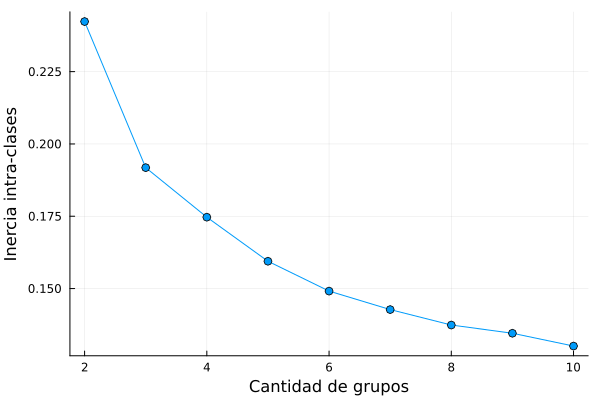

In [10]:
p

### Generación clusters

In [ ]:
# Fijar la semilla
Random.seed!(1234)
clusters, modas, inercia_intraclases = k_modas_wass(dict_OIJ, 4, 1e-5, 1e8)
println("Fin")

  0.000647 seconds (1.21 k allocations: 139.375 KiB)
  0.000359 seconds (520 allocations: 51.312 KiB)
  0.001316 seconds (2.74 k allocations: 421.812 KiB)
  0.000345 seconds (418 allocations: 40.047 KiB)
  0.000763 seconds (1.48 k allocations: 306.438 KiB)
  0.007693 seconds (8.47 k allocations: 1.440 MiB)
  0.001754 seconds (2.16 k allocations: 374.062 KiB)
  0.028068 seconds (22.96 k allocations: 4.370 MiB)
  0.001523 seconds (1.26 k allocations: 163.266 KiB)
  0.009865 seconds (10.73 k allocations: 1.597 MiB)
  0.000753 seconds (1.21 k allocations: 139.375 KiB)
  0.000423 seconds (520 allocations: 51.312 KiB)
  0.001290 seconds (2.74 k allocations: 421.812 KiB)
  0.000429 seconds (418 allocations: 40.047 KiB)
  0.000779 seconds (1.48 k allocations: 306.438 KiB)
  0.001490 seconds (2.68 k allocations: 425.984 KiB)
  0.000773 seconds (870 allocations: 126.438 KiB)
  0.010868 seconds (6.75 k allocations: 1.235 MiB, 52.90% gc time)
  0.000807 seconds (590 allocations: 56.500 KiB)
  0.00

In [ ]:
using Random

# Fijar la semilla para reproducibilidad
Random.seed!(1234)

# Variables para almacenar los mejores resultados
mejor_inercia = Inf  # Comenzamos con infinito para encontrar el mínimo
mejores_clusters = nothing
mejores_modas = nothing

# Ejecutar el proceso 25 veces
for i in 1:25
    # Ejecutar k_modas_wass
    clusters, modas, inercia_intraclases = k_modas_wass(dict_OIJ, 4, 1e-3, 1e3)
    
    # Guardar los resultados si la inercia es menor
    if inercia_intraclases < mejor_inercia
        mejor_inercia = inercia_intraclases
        mejores_clusters = clusters
        mejores_modas = modas
    end
end

println("Mejor inercia intraclases: $mejor_inercia")
println("Proceso finalizado")

## Base de COSEVI

In [3]:
# Pruebas
lista_dataframes =  load("COSEVI_sym_rol_prov.RData", convert = true)
dict_COSEVI = lista_dataframes["lista.sym.COSEVI"]

DictoVec{Matrix{Float64}}("tipo_lesion"=>[0.8036235770904107 0.17983789260385005 0.013290422551999524 0.0032481077537397937; 0.12248141942690209 0.8089960046397732 0.06005928599046269 0.008463289942862053; … ; 0.9791666666666666 0.013888888888888888 0.006944444444444444 0.0; 0.019886363636363636 0.9147727272727273 0.05113636363636364 0.014204545454545454],"sexo"=>[0.8041301627033792 0.19586983729662077; 0.9327232890836448 0.0672767109163552; … ; 0.8263888888888888 0.1736111111111111; 0.41761363636363635 0.5823863636363636],"ano"=>[0.1600214553906669 0.17211991179450503 … 0.12029918350318851 0.13725490196078433; 0.1446921854190832 0.1575374833526657 … 0.13489710873394337 0.14868754564591657; … ; 0.125 0.06944444444444445 … 0.2013888888888889 0.13194444444444445; 0.24147727272727273 0.08522727272727272 … 0.07670454545454546 0.22443181818181818],"dia"=>[0.12366648787174445 0.14163537755527744 … 0.1410095953274927 0.13987722748673936; 0.10418009193624608 0.14958972376165314 … 0.14928899772

### Gráfico del codo

In [4]:
inercia_values = Float64[]  # Crear un vector vacío para almacenar la menor inercia intraclase
ks_values = Int[]  # Vector para almacenar los valores de K

# Fijar la semilla para reproducibilidad
Random.seed!(1234)

Kmax = 10      # Máximo número de clusters a evaluar
num_inic = 15   # Número de inicializaciones por cada valor de K

# Abrir el archivo de resumen antes de empezar para agregar resultados durante la iteración
open("resumen_inercia.txt", "w") do archivo
    println(archivo, "K\tInercia_minima")
end

# Iterar K de 2 a Kmax para evaluar diferentes números de clusters
for K in 2:Kmax
    println("Evaluando K = $K...")  # Imprimir el mensaje al inicio de cada iteración
    
    inercia_minima = Inf  # Inicializar la inercia mínima con un valor grande
    clusters_minimos = []  # Para guardar los clusters correspondientes a la menor inercia

    # Ejecutar el algoritmo varias veces para encontrar la mejor inercia para este K
    for _ in 1:num_inic
        clusters, modas, inercia_intraclase = k_modas_wass(dict_COSEVI, K, 1e-4, 1e3)
        # Actualizar la inercia mínima y los clusters asociados si se encuentra un valor menor
        if inercia_intraclase < inercia_minima
            inercia_minima = inercia_intraclase
            clusters_minimos = clusters
        end
    end

    # Guardar los clusters correspondientes al mejor resultado para este K
    nombre_archivo = "resultados_COSEVI_K$(K).txt"
    open(nombre_archivo, "w") do archivo
        for elemento in clusters_minimos
            println(archivo, elemento)
        end
    end

    # Almacenar los valores de K e inercia mínima
    push!(inercia_values, inercia_minima)
    push!(ks_values, K)
    
    # Guardar los resultados de inercia mínima en el archivo de resumen
    open("resumen_inercia.txt", "a") do archivo
        println(archivo, "$K\t$inercia_minima")
    end
end

Evaluando K = 2...
  0.009814 seconds (10.19 k allocations: 1.558 MiB)
  0.050781 seconds (28.01 k allocations: 5.378 MiB)
  0.004112 seconds (3.94 k allocations: 568.797 KiB)
  0.015202 seconds (10.19 k allocations: 1.558 MiB)
  0.002736 seconds (1.46 k allocations: 175.531 KiB)
  0.017457 seconds (8.75 k allocations: 1.459 MiB)
  0.038042 seconds (23.80 k allocations: 5.073 MiB)
  0.003570 seconds (3.41 k allocations: 533.016 KiB)
  0.009824 seconds (8.75 k allocations: 1.459 MiB)
  0.001032 seconds (1.30 k allocations: 164.984 KiB)
  0.009495 seconds (9.33 k allocations: 1.498 MiB)
  0.045390 seconds (25.49 k allocations: 5.212 MiB)
  0.003616 seconds (3.62 k allocations: 546.391 KiB)
  0.016199 seconds (9.33 k allocations: 1.498 MiB)
  0.001098 seconds (1.36 k allocations: 168.922 KiB)
  0.010327 seconds (9.62 k allocations: 1.518 MiB)
  0.052598 seconds (26.33 k allocations: 5.267 MiB, 12.31% gc time)
  0.003690 seconds (3.73 k allocations: 554.062 KiB)
  0.010230 seconds (9.62 k 

Excessive output truncated after 524322 bytes.

  0.000236 seconds (319 allocations: 22.922 KiB)
  0.001146 seconds (1.82 k allocations: 344.078 KiB)
  0.002817 seconds (4.36 k allocations: 1.019 MiB)
  0.000995 seconds (876 allocations: 113.469 KiB)
  0.001788 seconds (1.82 k allocations: 344.078 KiB)


In [ ]:
# # Inicializar vectores
# K = Int[]
# inercia_values = Float64[]
# # Abrir y procesar el archivo
# open("resumen_inercia.txt", "r") do file
#     lines = readlines(file) # Leer todas las líneas del archivo
    
#     # Ignorar la primera línea (encabezados)
#     data_lines = lines[2:end]
    
#     # Procesar cada línea de datos
#     for line in data_lines
#         values = split(line, '\t') # Dividir por tabulación
#         push!(K, parse(Int, values[1])) # Convertir el primer valor a entero
#         push!(inercia_values, parse(Float64, values[2])) # Convertir el segundo valor a flotante
#     end
    
#     # Mostrar los resultados
#     println("K: ", K)
#     println("Inercia: ", inercia_values)
# end

K: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Inercia: [0.18313570052362435, 0.15081879513417862, 0.12704041350667508, 0.11716189693474754, 0.10025582427303371, 0.09389821526592437, 0.08913878500261514, 0.08385269872246072, 0.08297149391089127, 0.0745506001191876, 0.07400036288468034, 0.06985902764538295, 0.07198438571910325, 0.06692290373801459]


In [5]:
# Graficar K contra la inercia intraclase
p = plot(2:Kmax, inercia_values, marker=:o, xlabel="Número de grupos (K)", ylabel="Inercia intra-clases", title="", legend=false)
# Guardar el gráfico como PDF
savefig(p, "grafico_codo_COSEVI.pdf")

"c:\\Users\\Peanuts\\Documents\\GitHub\\WassCatDistClust\\grafico_codo_COSEVI.pdf"

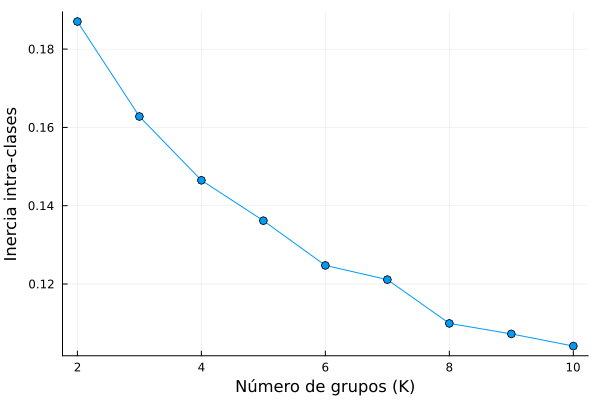

In [ ]:
p

### Generación clusters

In [ ]:
# Fijar la semilla
Random.seed!(1234)
clusters, modas, inercia_intraclases = k_modas_wass(dict_COSEVI, 4, 1e-5, 1e8)
println("Fin")

  0.000647 seconds (1.21 k allocations: 139.375 KiB)
  0.000359 seconds (520 allocations: 51.312 KiB)
  0.001316 seconds (2.74 k allocations: 421.812 KiB)
  0.000345 seconds (418 allocations: 40.047 KiB)
  0.000763 seconds (1.48 k allocations: 306.438 KiB)
  0.007693 seconds (8.47 k allocations: 1.440 MiB)
  0.001754 seconds (2.16 k allocations: 374.062 KiB)
  0.028068 seconds (22.96 k allocations: 4.370 MiB)
  0.001523 seconds (1.26 k allocations: 163.266 KiB)
  0.009865 seconds (10.73 k allocations: 1.597 MiB)
  0.000753 seconds (1.21 k allocations: 139.375 KiB)
  0.000423 seconds (520 allocations: 51.312 KiB)
  0.001290 seconds (2.74 k allocations: 421.812 KiB)
  0.000429 seconds (418 allocations: 40.047 KiB)
  0.000779 seconds (1.48 k allocations: 306.438 KiB)
  0.001490 seconds (2.68 k allocations: 425.984 KiB)
  0.000773 seconds (870 allocations: 126.438 KiB)
  0.010868 seconds (6.75 k allocations: 1.235 MiB, 52.90% gc time)
  0.000807 seconds (590 allocations: 56.500 KiB)
  0.00

In [ ]:
using Random

# Fijar la semilla para reproducibilidad
Random.seed!(1234)

# Variables para almacenar los mejores resultados
mejor_inercia = Inf  # Comenzamos con infinito para encontrar el mínimo
mejores_clusters = nothing
mejores_modas = nothing

# Ejecutar el proceso 25 veces
for i in 1:25
    # Ejecutar k_modas_wass
    clusters, modas, inercia_intraclases = k_modas_wass(dict_OIJ, 4, 1e-3, 1e3)
    
    # Guardar los resultados si la inercia es menor
    if inercia_intraclases < mejor_inercia
        mejor_inercia = inercia_intraclases
        mejores_clusters = clusters
        mejores_modas = modas
    end
end

println("Mejor inercia intraclases: $mejor_inercia")
println("Proceso finalizado")

## Base de Batagelj

In [3]:
# Pruebas
lista_dataframes =  load("Batagelj_sym_gen.RData", convert = true)
dict_Batagelj = lista_dataframes["lista.sym.Batagelj"]

DictoVec{Matrix{Float64}}("M"=>[0.17698374551292007 0.14547434110000962 … 0.003980137377509496 0.00226262164609452; 0.07089000536570318 0.07726555554985343 … 0.018559858952142603 0.022173868170203982; … ; 0.1710663352474756 0.14981748533865355 … 0.004419138223048692 0.0029779729526083027; 0.12946233822441922 0.12332998399153107 … 0.006491387535312438 0.006207268698724278],"F"=>[0.17614639139917507 0.14571598848317213 … 0.0034924733347066307 0.002011891077603355; 0.07477006702685669 0.08106135703672582 … 0.013998393806307045 0.01116348382099037; … ; 0.17504920115610043 0.15205990204064496 … 0.003730268615274978 0.002546381084412515; 0.13216577829181833 0.12537419367693117 … 0.006133428360426616 0.005655244362148601])

### Gráfico del codo

In [7]:
inercia_values = Float64[]  # Crear un vector vacío para almacenar la menor inercia intraclase
ks_values = Int[]  # Vector para almacenar los valores de K

# Fijar la semilla para reproducibilidad
Random.seed!(1234)

Kmax = 10      # Máximo número de clusters a evaluar
num_inic = 15   # Número de inicializaciones por cada valor de K

# Abrir el archivo de resumen antes de empezar para agregar resultados durante la iteración
open("resumen_inercia.txt", "w") do archivo
    println(archivo, "K\tInercia_minima")
end

# Iterar K de 2 a Kmax para evaluar diferentes números de clusters
for K in 2:Kmax
    println("Evaluando K = $K...")  # Imprimir el mensaje al inicio de cada iteración
    
    inercia_minima = Inf  # Inicializar la inercia mínima con un valor grande
    clusters_minimos = []  # Para guardar los clusters correspondientes a la menor inercia

    # Ejecutar el algoritmo varias veces para encontrar la mejor inercia para este K
    for _ in 1:num_inic
        clusters, modas, inercia_intraclase = k_modas_wass(dict_Batagelj, K, 1e-4, 1e3)
        # Actualizar la inercia mínima y los clusters asociados si se encuentra un valor menor
        if inercia_intraclase < inercia_minima
            inercia_minima = inercia_intraclase
            clusters_minimos = clusters
        end
    end

    # Guardar los clusters correspondientes al mejor resultado para este K
    nombre_archivo = "resultados_Batagelj_K$(K).txt"
    open(nombre_archivo, "w") do archivo
        for elemento in clusters_minimos
            println(archivo, elemento)
        end
    end

    # Almacenar los valores de K e inercia mínima
    push!(inercia_values, inercia_minima)
    push!(ks_values, K)
    
    # Guardar los resultados de inercia mínima en el archivo de resumen
    open("resumen_inercia.txt", "a") do archivo
        println(archivo, "$K\t$inercia_minima")
    end
end

Evaluando K = 2...
  0.719209 seconds (194.91 k allocations: 31.758 MiB, 2.71% gc time)
  0.710559 seconds (194.91 k allocations: 31.758 MiB, 2.66% gc time)
  0.831370 seconds (165.84 k allocations: 29.679 MiB)
  0.716174 seconds (165.84 k allocations: 29.679 MiB, 6.23% gc time)
  0.770739 seconds (198.15 k allocations: 31.974 MiB, 0.95% gc time)
  0.725038 seconds (198.15 k allocations: 31.974 MiB, 0.94% gc time)
  0.736976 seconds (162.61 k allocations: 29.463 MiB, 1.08% gc time)
  0.612041 seconds (162.61 k allocations: 29.463 MiB)
  0.664020 seconds (198.15 k allocations: 31.974 MiB, 1.10% gc time)
  0.661055 seconds (198.15 k allocations: 31.974 MiB)
  0.662504 seconds (162.61 k allocations: 29.463 MiB)
  0.836989 seconds (162.61 k allocations: 29.463 MiB, 29.23% gc time)
  0.449707 seconds (139.99 k allocations: 22.608 MiB, 1.18% gc time)
  0.408776 seconds (139.99 k allocations: 22.608 MiB)
  1.149535 seconds (220.75 k allocations: 33.488 MiB)
  1.182787 seconds (220.75 k alloca

Excessive output truncated after 524294 bytes.

In [9]:
# Graficar K contra la inercia intraclase
p = plot(2:10, inercia_values, marker=:o, xlabel="Cantidad de grupos", ylabel="Inercia intra-clases", title="", legend=false)
# Guardar el gráfico como PDF
savefig(p, "grafico_codo_Batagelj.pdf")

"c:\\Users\\Peanuts\\Documents\\GitHub\\WassCatDistClust\\grafico_codo_Batagelj.pdf"

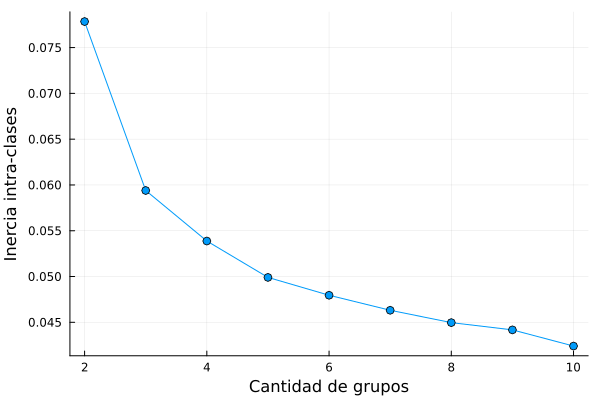

In [10]:
p

In [ ]:
# # Inicializar vectores
# K = Int[]
# inercia_values = Float64[]
# # Abrir y procesar el archivo
# open("resumen_inercia.txt", "r") do file
#     lines = readlines(file) # Leer todas las líneas del archivo
    
#     # Ignorar la primera línea (encabezados)
#     data_lines = lines[2:end]
    
#     # Procesar cada línea de datos
#     for line in data_lines
#         values = split(line, '\t') # Dividir por tabulación
#         push!(K, parse(Int, values[1])) # Convertir el primer valor a entero
#         push!(inercia_values, parse(Float64, values[2])) # Convertir el segundo valor a flotante
#     end
    
#     # Mostrar los resultados
#     println("K: ", K)
#     println("Inercia: ", inercia_values)
# end

K: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Inercia: [0.18313570052362435, 0.15081879513417862, 0.12704041350667508, 0.11716189693474754, 0.10025582427303371, 0.09389821526592437, 0.08913878500261514, 0.08385269872246072, 0.08297149391089127, 0.0745506001191876, 0.07400036288468034, 0.06985902764538295, 0.07198438571910325, 0.06692290373801459]


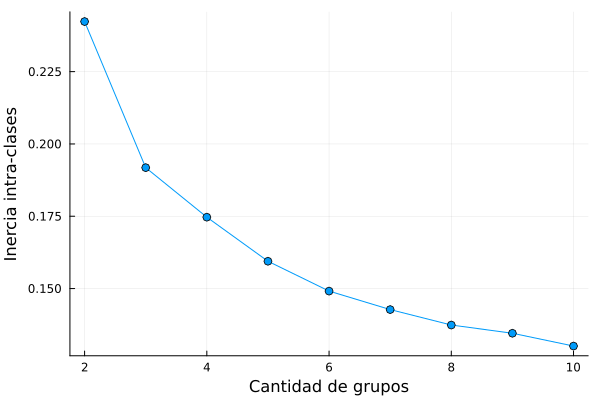

In [ ]:
p

## Otros

In [26]:
keys(modas[1])

KeySet for a Dict{Any, Any} with 5 entries. Keys:
  "dia_semana"
  "edad"
  "mes"
  "genero"
  "hora"

In [28]:
modas[1]["edad"]

3-element Vector{Float64}:
 0.8894573360131554
 0.04092819294719543
 0.06961447103964918

In [ ]:
using Plots

# Suponemos que dict_OIJ ya está definido
inercia_values = Float64[]  # Crear un vector vacío para almacenar la menor inercia intraclase

# Iterar K de 2 a 10
for K in 2:10
    inercia_minima = Inf  # Inicializa la inercia mínima con un valor grande
    # Ejecutar 25 veces el algoritmo para cada K
    for _ in 1:5
        clusters, modas, inercia_intraclase = k_modas_wass(dict_OIJ, K, 1e-3, 1e3)
        # Actualiza la inercia mínima
        if inercia_intraclase < inercia_minima
            inercia_minima = inercia_intraclase
        end
    end
    
    # Almacenar la menor inercia encontrada para este valor de K
    push!(inercia_values, inercia_minima)
end

In [ ]:
# Graficar K contra la inercia intraclase
plot(2:10, inercia_values, marker=:o, xlabel="Número de grupos (K)", ylabel="Inercia intraclases", title="", legend=false)

In [ ]:
keys(modas[1])

KeySet for a Dict{Any, Any} with 5 entries. Keys:
  "dia_semana"
  "edad"
  "mes"
  "genero"
  "hora"

In [ ]:
modas[1]["edad"]

3-element Vector{Float64}:
 0.8894573360131554
 0.04092819294719543
 0.06961447103964918

In [ ]:
# Guardar los mejores clusters en un archivo
nombre_archivo = "resultados4modas_delito_prov.txt"
open(nombre_archivo, "w") do archivo
    for elemento in mejores_clusters
        println(archivo, elemento)
    end
end

In [ ]:
# Nombre del archivo de salida
nombre_archivo = "resultados4modas_delito_prov.txt"

# Guardar el vector en el archivo de texto
open(nombre_archivo, "w") do archivo
    for elemento in clusters
        println(archivo, elemento)
    end
end

In [ ]:

# # Nombre del archivo de salida
# nombre_archivo = "resultados4modasprovrol_inercia.txt"

# # Guardar el vector en el archivo de texto
# open(nombre_archivo, "w") do archivo
#     for elemento in inercia_values
#         println(archivo, elemento)
#     end
# end

In [ ]:
using Plots

# Supongamos que dict_OIJ ya está definido
inercia_values = Float64[]  # Crear un vector vacío para almacenar inercia intraclase

# Iterar K de 2 a 20
for K in 2:10
    # COSEVI K 2:8 1e-4, 1e8 OIJ 1e-3
    clusters, modas, inercia_intraclase = k_modas_wass(dict_OIJ, K, 1e-10, 1e6)
    push!(inercia_values, inercia_intraclase)  # Almacenar la inercia
end

  0.007859 seconds (8.18 k allocations: 1.353 MiB)
  0.001608 seconds (2.10 k allocations: 369.000 KiB)
  0.130373 seconds (58.82 k allocations: 10.007 MiB, 4.86% gc time)
  0.023306 seconds (22.12 k allocations: 4.315 MiB)
  0.001014 seconds (1.23 k allocations: 160.859 KiB)
  0.009527 seconds (10.36 k allocations: 1.572 MiB)
  0.003751 seconds (4.73 k allocations: 1.101 MiB)
  0.001019 seconds (1.31 k allocations: 166.031 KiB)
  0.071414 seconds (32.41 k allocations: 5.915 MiB)
  0.015419 seconds (12.31 k allocations: 2.052 MiB)
  0.001331 seconds (849 allocations: 124.766 KiB)
  0.006516 seconds (5.94 k allocations: 1.185 MiB)
  0.007139 seconds (7.89 k allocations: 1.334 MiB)
  0.001852 seconds (2.03 k allocations: 365.359 KiB)
  0.132207 seconds (56.62 k allocations: 9.859 MiB)
  0.025806 seconds (21.28 k allocations: 4.260 MiB)
  0.000888 seconds (1.20 k allocations: 157.844 KiB)
  0.009148 seconds (10.00 k allocations: 1.547 MiB)
  0.004032 seconds (5.02 k allocations: 1.119 MiB

Excessive output truncated after 524311 bytes.

  0.002574 seconds (4.62 k allocations: 1.020 MiB)
  0.001268 seconds (1.94 k allocations: 335.234 KiB)
  0.000770 seconds (352 allocations: 25.125 KiB)
  0.001200 seconds (1.08 k allocations: 129.844 KiB)
  0.001398 seconds (1.21 k allocations: 139.375 KiB)
  0.000717 seconds (520 allocations: 51.312 KiB)
  0.006236 seconds (6.74 k allocations: 1.172 MiB)
  0.001898 seconds (2.74 k allocations: 421.812 KiB)
  0.000701 seconds (418 allocations: 40.047 KiB)
  0.001491 seconds (1.48 k allocations: 306.438 KiB)


In [ ]:
using Plots

# Suponemos que dict_OIJ ya está definido
inercia_values = Float64[]  # Crear un vector vacío para almacenar la menor inercia intraclase

# Iterar K de 2 a 10
for K in 2:10
    inercia_minima = Inf  # Inicializa la inercia mínima con un valor grande
    # Ejecutar 25 veces el algoritmo para cada K
    for _ in 1:5
        clusters, modas, inercia_intraclase = k_modas_wass(dict_OIJ, K, 1e-3, 1e3)
        # Actualiza la inercia mínima
        if inercia_intraclase < inercia_minima
            inercia_minima = inercia_intraclase
        end
    end
    
    # Almacenar la menor inercia encontrada para este valor de K
    push!(inercia_values, inercia_minima)
end

In [ ]:
# Graficar K contra la inercia intraclase
plot(2:10, inercia_values, marker=:o, xlabel="Número de grupos (K)", ylabel="Inercia intraclases", title="", legend=false)

In [ ]:
indices_cluster_k = [1, 2, 3, 4, 5, 6, 9, 15]
conceptos_cluster_k = selecciona_indices(dict_OIJ, indices_cluster_k);

Acá 2


In [ ]:
conceptos_cluster_k["delito"]

8×6 Matrix{Float64}:
 0.411252  0.00732303  0.400442  0.0596304  0.0518424  0.0695106
 0.363392  0.0215343   0.235532  0.125168   0.123822   0.130552
 0.353282  0.0212355   0.264479  0.138996   0.149614   0.0723938
 0.30495   0.00594059  0.221782  0.166337   0.126733   0.174257
 0.256329  0.00632911  0.240506  0.183544   0.167722   0.14557
 0.29065   0.0142276   0.300813  0.126016   0.168699   0.0995935
 0.284897  0.00457666  0.303204  0.144165   0.0926773  0.170481
 0.228571  0.0285714   0.295238  0.142857   0.171429   0.133333

In [ ]:
moda_cluster_k = moda_wass_mult(conceptos_cluster_k);

Acá 1delito
Acá 2  0.001283 seconds (2.11 k allocations: 370.047 KiB)


In [ ]:
variables = collect(keys(conceptos_cluster_k))
for var in variables
    println(var)
    P = conceptos_cluster_k[var];
    moda, conjunta, costo = moda_wass(P);
    println(moda)
end

delito
  0.002141 seconds (2.11 k allocations: 370.047 KiB)
[0.2988770828302342, 0.014227642276422764, 0.287833129296544, 0.138996138996139, 0.12673267326732673, 0.13333333333333347]


In [ ]:
# Moda multivariada
function moda_wass_mult(diccionario; lambdas = nothing)
    # Crear diccionario vacío para almacenar las modas de cada variable
    modas = Dict();
    variables =  collect(keys(diccionario));
    print("Acá 1")
    for var in variables
        println(var)
        print("Acá 2")
        P = diccionario[var];
        moda, conjunta, costo = moda_wass(P; lambdas);
        modas[var] = moda;
    end
    return modas
end


moda_wass_mult (generic function with 1 method)

In [ ]:
lista_dataframes =  load("OIJ_sym.RData", convert = true)
dict_OIJ = lista_dataframes["lista.sym"]
# modas_OIJ =  moda_wass_mult(dict_OIJ)
# medias_OIJ = media_mult(dict_OIJ);

DictoVec{Matrix{Float64}}("delito"=>[0.3359375 0.2231570512820513 … 0.04587339743589743 0.017628205128205128; 0.34152428489153386 0.19475907083893262 … 0.24582453445958918 0.002015741985025917; … ; 0.2 0.4 … 0.0 0.0; 0.045454545454545456 0.48484848484848486 … 0.045454545454545456 0.007575757575757576],"hora"=>[0.32572115384615385 0.1450320512820513 … 0.06350160256410256 0.09975961538461539; 0.23804952966020348 0.2541754655404108 … 0.032827798041850646 0.1039546937991937; … ; 0.0 0.0 … 0.0 0.6; 0.4318181818181818 0.06818181818181818 … 0.05303030303030303 0.07575757575757576],"edad"=>[0.8739983974358975 0.04827724358974359 0.07772435897435898; 0.9240737185640238 0.035323478594739874 0.040602802841236324; … ; 1.0 0.0 0.0; 0.8939393939393939 0.09090909090909091 0.015151515151515152],"genero"=>[0.335536858974359 0.6644631410256411; 0.35064311768093687 0.6493568823190632; … ; 0.4 0.6; 0.4166666666666667 0.5833333333333334],"nacionalidad"=>[0.9144631410256411 0.08553685897435898; 0.8632175081

In [ ]:
P = [0.4 0.6;
     0.8 0.2;
     0.7 0.3];
q_mod, w, costo = moda_wass(P);
q_prom = mean(P, dims=1);
costo_mod = sum([dist_wass(P[i,:],q_mod)/3 for i in 1:3])
costo_prom = sum([dist_wass(P[i,:],q_prom)/3 for i in 1:3])
println("Costo moda\t")
println(costo_mod)
println("Costo prom\t")
println(costo_prom)

MethodError: MethodError: no method matching /(::Tuple{Float64, Matrix{VariableRef}}, ::Int64)

Closest candidates are:
  /(!Matched::Missing, ::Number)
   @ Base missing.jl:123
  /(!Matched::MutableArithmetics.Zero, ::Any)
   @ MutableArithmetics C:\Users\Peanuts\.julia\packages\MutableArithmetics\sjjl8\src\rewrite.jl:74
  /(!Matched::ColorVectorSpace.RGBRGB, ::Real)
   @ ColorVectorSpace C:\Users\Peanuts\.julia\packages\ColorVectorSpace\tLy1N\src\ColorVectorSpace.jl:419
  ...


In [ ]:
costo_prom

0.07777777777777777

In [ ]:
P = [0.4 0.6;
     0.8 0.2;
     0.7 0.3];

In [ ]:
q,w = dist_wass(P[1,:],q_prom)

(0.11666666666666668, [0.4 0.0; 0.23333333333333336 0.36666666666666664])

In [ ]:
values(w)

2×2 Matrix{VariableRef}:
 w[1,1]  w[1,2]
 w[2,1]  w[2,2]

In [ ]:
costo_prom

0.07777777777777777

In [ ]:
q_prom

1×2 Matrix{Float64}:
 0.633333  0.366667

In [ ]:
q,w_val = dist_wass(P[1,:],q_prom);
w_val

2×2 Matrix{Float64}:
 0.4       0.0
 0.233333  0.366667

In [ ]:
q_mod, w, costo = moda_wass(P);

In [ ]:
sum([w[i,j,k]/6 for i in 1:3 for j in 1:2 for k in 1:2 if k!=j])

0.06666666666666667

In [ ]:
q_mod

2-element Vector{Float64}:
 0.7
 0.3

In [ ]:
sqrt(0.3+0.1)

0.6324555320336759

In [ ]:
P

3×2 Matrix{Float64}:
 0.4  0.6
 0.8  0.2
 0.7  0.3

In [ ]:
w[1,:,:]

2×2 Matrix{Float64}:
 0.4  0.0
 0.3  0.3

In [ ]:
w[2,:,:]

2×2 Matrix{Float64}:
 0.7  0.1
 0.0  0.2

In [ ]:
w[3,:,:]

2×2 Matrix{Float64}:
 0.7  0.0
 0.0  0.3

In [ ]:
(0.1+0.3)/(2*3)

0.06666666666666667

In [ ]:
n = 100
K = 5
# Escogencia aleatoria inicial de índices
randperm(n)[1:K]

5-element Vector{Int64}:
 86
 32
 36
 39
 57

In [ ]:
# Inicialización de las modas aleatorias
modas = Dict()

Dict{Any, Any}()

In [ ]:
# Pruebas
lista_dataframes =  load("OIJ_sym.RData", convert = true)
dict_OIJ = lista_dataframes["lista.sym"]
prueba = k_modas_wass(dict_OIJ, 5, 1e-2, 1e5)
println("Fin")

Llega a asignación
Concepto:1Cluster:1
Concepto:1Cluster:2
Concepto:1Cluster:3
Concepto:1Cluster:4
Concepto:1Cluster:5
Concepto:2Cluster:1
Concepto:2Cluster:2
Concepto:2Cluster:3
Concepto:2Cluster:4
Concepto:2Cluster:5
Concepto:3Cluster:1
Concepto:3Cluster:2
Concepto:3Cluster:3
Concepto:3Cluster:4
Concepto:3Cluster:5
Concepto:4Cluster:1
Concepto:4Cluster:2
Concepto:4Cluster:3
Concepto:4Cluster:4
Concepto:4Cluster:5
Concepto:5Cluster:1
Concepto:5Cluster:2
Concepto:5Cluster:3
Concepto:5Cluster:4
Concepto:5Cluster:5
Concepto:6Cluster:1
Concepto:6Cluster:2
Concepto:6Cluster:3
Concepto:6Cluster:4
Concepto:6Cluster:5
Concepto:7Cluster:1
Concepto:7Cluster:2
Concepto:7Cluster:3
Concepto:7Cluster:4
Concepto:7Cluster:5
Concepto:8Cluster:1
Concepto:8Cluster:2
Concepto:8Cluster:3
Concepto:8Cluster:4
Concepto:8Cluster:5
Concepto:9Cluster:1
Concepto:9Cluster:2
Concepto:9Cluster:3
Concepto:9Cluster:4
Concepto:9Cluster:5
Concepto:10Cluster:1
Concepto:10Cluster:2
Concepto:10Cluster:3
Concepto:10Cluster

MethodError: MethodError: objects of type Dict{Any, Any} are not callable